# The Spark Foundation 
# Data Science& Business Analytics Tasks
## Intern : Nithish V

# Task 2:Predicting the optimum number of clusters and representing it visually

### 1>Importing Libraires

In [59]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

### 2>Read Dataset

In [60]:
data = pd.read_csv('Iris.csv')
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [61]:
data['Species'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

In [62]:
data['PetalWidthCm'].value_counts()

0.2    28
1.3    13
1.5    12
1.8    12
1.4     8
2.3     8
1.0     7
0.3     7
0.4     7
0.1     6
2.0     6
2.1     6
1.2     5
1.9     5
1.6     4
2.5     3
2.2     3
2.4     3
1.1     3
1.7     2
0.6     1
0.5     1
Name: PetalWidthCm, dtype: int64

In [63]:
data['PetalLengthCm'].value_counts()

1.5    14
1.4    12
5.1     8
4.5     8
1.3     7
1.6     7
5.6     6
4.0     5
4.9     5
4.7     5
4.8     4
1.7     4
4.4     4
4.2     4
5.0     4
4.1     3
5.5     3
4.6     3
6.1     3
5.7     3
3.9     3
5.8     3
1.2     2
1.9     2
6.7     2
3.5     2
5.9     2
6.0     2
5.4     2
5.3     2
3.3     2
4.3     2
5.2     2
6.3     1
1.1     1
6.4     1
3.6     1
3.7     1
3.0     1
3.8     1
6.6     1
6.9     1
1.0     1
Name: PetalLengthCm, dtype: int64

In [64]:
data['SepalLengthCm'].value_counts()

5.0    10
6.3     9
5.1     9
6.7     8
5.7     8
5.5     7
5.8     7
6.4     7
6.0     6
4.9     6
6.1     6
5.4     6
5.6     6
6.5     5
4.8     5
7.7     4
6.9     4
5.2     4
6.2     4
4.6     4
7.2     3
6.8     3
4.4     3
5.9     3
6.6     2
4.7     2
7.6     1
7.4     1
4.3     1
7.9     1
7.3     1
7.0     1
4.5     1
5.3     1
7.1     1
Name: SepalLengthCm, dtype: int64

In [65]:
data['SepalWidthCm'].value_counts()

3.0    26
2.8    14
3.2    13
3.4    12
3.1    12
2.9    10
2.7     9
2.5     8
3.5     6
3.8     6
3.3     6
2.6     5
2.3     4
3.6     3
2.4     3
2.2     3
3.7     3
3.9     2
4.2     1
4.1     1
4.4     1
2.0     1
4.0     1
Name: SepalWidthCm, dtype: int64

### Since Species as the least number of groups lets find clusters from the set species

### 3>Mapping 

In [66]:
data_mapped= data.copy()
data_mapped['Species']=data_mapped['Species'].map({'Iris-setosa':0,'Iris-virginica':2,'Iris-versicolor':1})
data_mapped

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


### 4>Elbow Curve To Obtain the Centroids

In [67]:
wcss = []
# 'cl_num' is a that keeps track the highest number of clusters we want to use the WCSS method for. We have it set at 10 right now, but it is completely arbitrary.
cl_num = 10
for i in range (1,cl_num):
    kmeans= KMeans(i)
    kmeans.fit(data_mapped)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)
wcss

[282018.32439999987,
 70649.63226666668,
 31326.886800000007,
 17797.116927453764,
 11453.104608083058,
 7905.270892307693,
 5913.611600602294,
 4578.602796353627,
 3566.406066176471]

Text(0, 0.5, 'Within-cluster Sum of Squares')

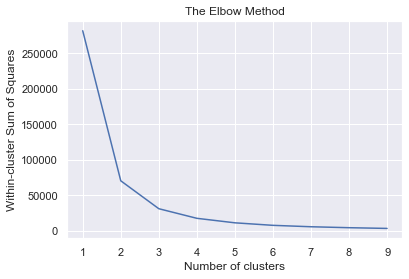

In [68]:
number_clusters = range(1,cl_num)
plt.plot(number_clusters, wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')

### From Above lets take 3 Clusters

### 5> Representing the clusters

In [69]:
x = data_mapped.iloc[:,5:6]
x

,Species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [70]:
kmeans = KMeans(3)
kmeans.fit(x)

KMeans(n_clusters=3)

In [71]:
ic=kmeans.fit_predict(x)
ic

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [72]:
dwc = data_mapped.copy()

In [73]:
dwc['cluster']=ic
dwc

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster
0,1,5.1,3.5,1.4,0.2,0,2
1,2,4.9,3.0,1.4,0.2,0,2
2,3,4.7,3.2,1.3,0.2,0,2
3,4,4.6,3.1,1.5,0.2,0,2
4,5,5.0,3.6,1.4,0.2,0,2
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2,1
146,147,6.3,2.5,5.0,1.9,2,1
147,148,6.5,3.0,5.2,2.0,2,1
148,149,6.2,3.4,5.4,2.3,2,1


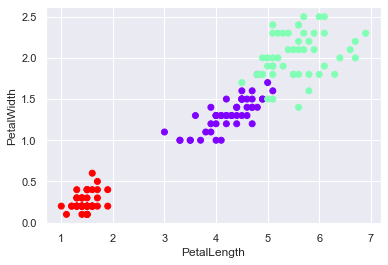

In [74]:
plt.scatter(dwc['PetalLengthCm'],dwc['PetalWidthCm'],c=dwc['cluster'],cmap='rainbow')
plt.xlabel('PetalLength')
plt.ylabel('PetalWidth')
plt.show()

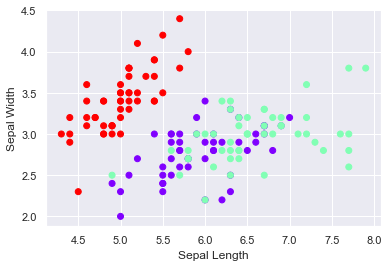

In [75]:
plt.scatter(dwc['SepalLengthCm'],dwc['SepalWidthCm'],c=dwc['cluster'],cmap='rainbow')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

## The optimum number of clusters are 3 determined from Elbow Curve and Represented Visually

## Thankyou